In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20,20)

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [2]:
df = pd.read_csv('Dataset/kidney_disease.csv').drop('id',axis=1)

In [3]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
columns = pd.read_csv('Dataset/data_description.txt',sep='-').reset_index()
columns.columns = ['cols','abb_cols']
columns

,cols,abb_cols
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [5]:
df.columns = columns.abb_cols.values[1:]

In [6]:
df

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors='coerce')

In [8]:
features = ['packed cell volume','white blood cell count','red blood cell count']

[convert_dtype(df,feature) for feature in features]

[None, None, None]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red blood cells          248 non-null    object 
 6    pus cell                335 non-null    object 
 7   pus cell clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
df.isna().sum()/df.shape[0]*100

age                         2.25
blood pressure              3.00
specific gravity           11.75
albumin                    11.50
sugar                      12.25
red blood cells            38.00
 pus cell                  16.25
pus cell clumps             1.00
bacteria                    1.00
blood glucose random       11.00
blood urea                  4.75
serum creatinine            4.25
sodium                     21.75
potassium                  22.00
haemoglobin                13.00
packed cell volume         17.75
white blood cell count     26.50
red blood cell count       32.75
ypertension                 0.50
diabetes mellitus           0.50
coronary artery disease     0.50
appetite                    0.25
pedal edema                 0.25
anemia                      0.25
class                       0.00
dtype: float64

In [11]:
df.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [12]:
df.columns = ['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red blood cells          248 non-null    object 
 6   pus cell                 335 non-null    object 
 7   pus cell clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [14]:
from ipywidgets import interact

In [15]:
cat_cols = [col for col in df.columns if df[col].dtype=='O']
num_cols = [col for col in df.columns if df[col].dtype!='O']

In [16]:
@interact
def check(col = cat_cols):
    return df[col].value_counts()
# [df[col].value_counts() for col in df.columns if df[col].dtype=='O']

interactive(children=(Dropdown(description='col', options=('red blood cells', 'pus cell', 'pus cell clumps', '…

In [17]:
df

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [18]:
[df[i][df[i].fillna(df[i].mode()[0]).str.startswith('\t')] for i in cat_cols]

[Series([], Name: red blood cells, dtype: object),
 Series([], Name: pus cell, dtype: object),
 Series([], Name: pus cell clumps, dtype: object),
 Series([], Name: bacteria, dtype: object),
 Series([], Name: ypertension, dtype: object),
 65      \tno
 88     \tyes
 138     \tno
 188     \tno
 194    \tyes
 Name: diabetes mellitus, dtype: object,
 40    \tno
 64    \tno
 Name: coronary artery disease, dtype: object,
 Series([], Name: appetite, dtype: object),
 Series([], Name: pedal edema, dtype: object),
 Series([], Name: anemia, dtype: object),
 Series([], Name: class, dtype: object)]

In [19]:
[df[i][df[i].fillna(df[i].mode()[0]).str.endswith('\t')] for i in cat_cols]

[Series([], Name: red blood cells, dtype: object),
 Series([], Name: pus cell, dtype: object),
 Series([], Name: pus cell clumps, dtype: object),
 Series([], Name: bacteria, dtype: object),
 Series([], Name: ypertension, dtype: object),
 Series([], Name: diabetes mellitus, dtype: object),
 Series([], Name: coronary artery disease, dtype: object),
 Series([], Name: appetite, dtype: object),
 Series([], Name: pedal edema, dtype: object),
 Series([], Name: anemia, dtype: object),
 37     ckd\t
 230    ckd\t
 Name: class, dtype: object]

In [20]:
to_replace = ['\t?','\tno','\tyes','ckd\t',' yes']
replace_with = '\t? \tno \tyes ckd\t yes'.split()

In [21]:
to_replace,replace_with

(['\t?', '\tno', '\tyes', 'ckd\t', ' yes'], ['?', 'no', 'yes', 'ckd', 'yes'])

In [22]:
df.replace(to_replace,replace_with,inplace=True)
df.replace('?',np.nan,inplace=True)

In [23]:
@interact
def check(col = cat_cols):
    return df[col].value_counts()
# [df[col].value_counts() for col in df.columns if df[col].dtype=='O']

interactive(children=(Dropdown(description='col', options=('red blood cells', 'pus cell', 'pus cell clumps', '…

In [24]:
df

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


#### Check distribution of each numerical columns

In [25]:
len(num_cols)

14

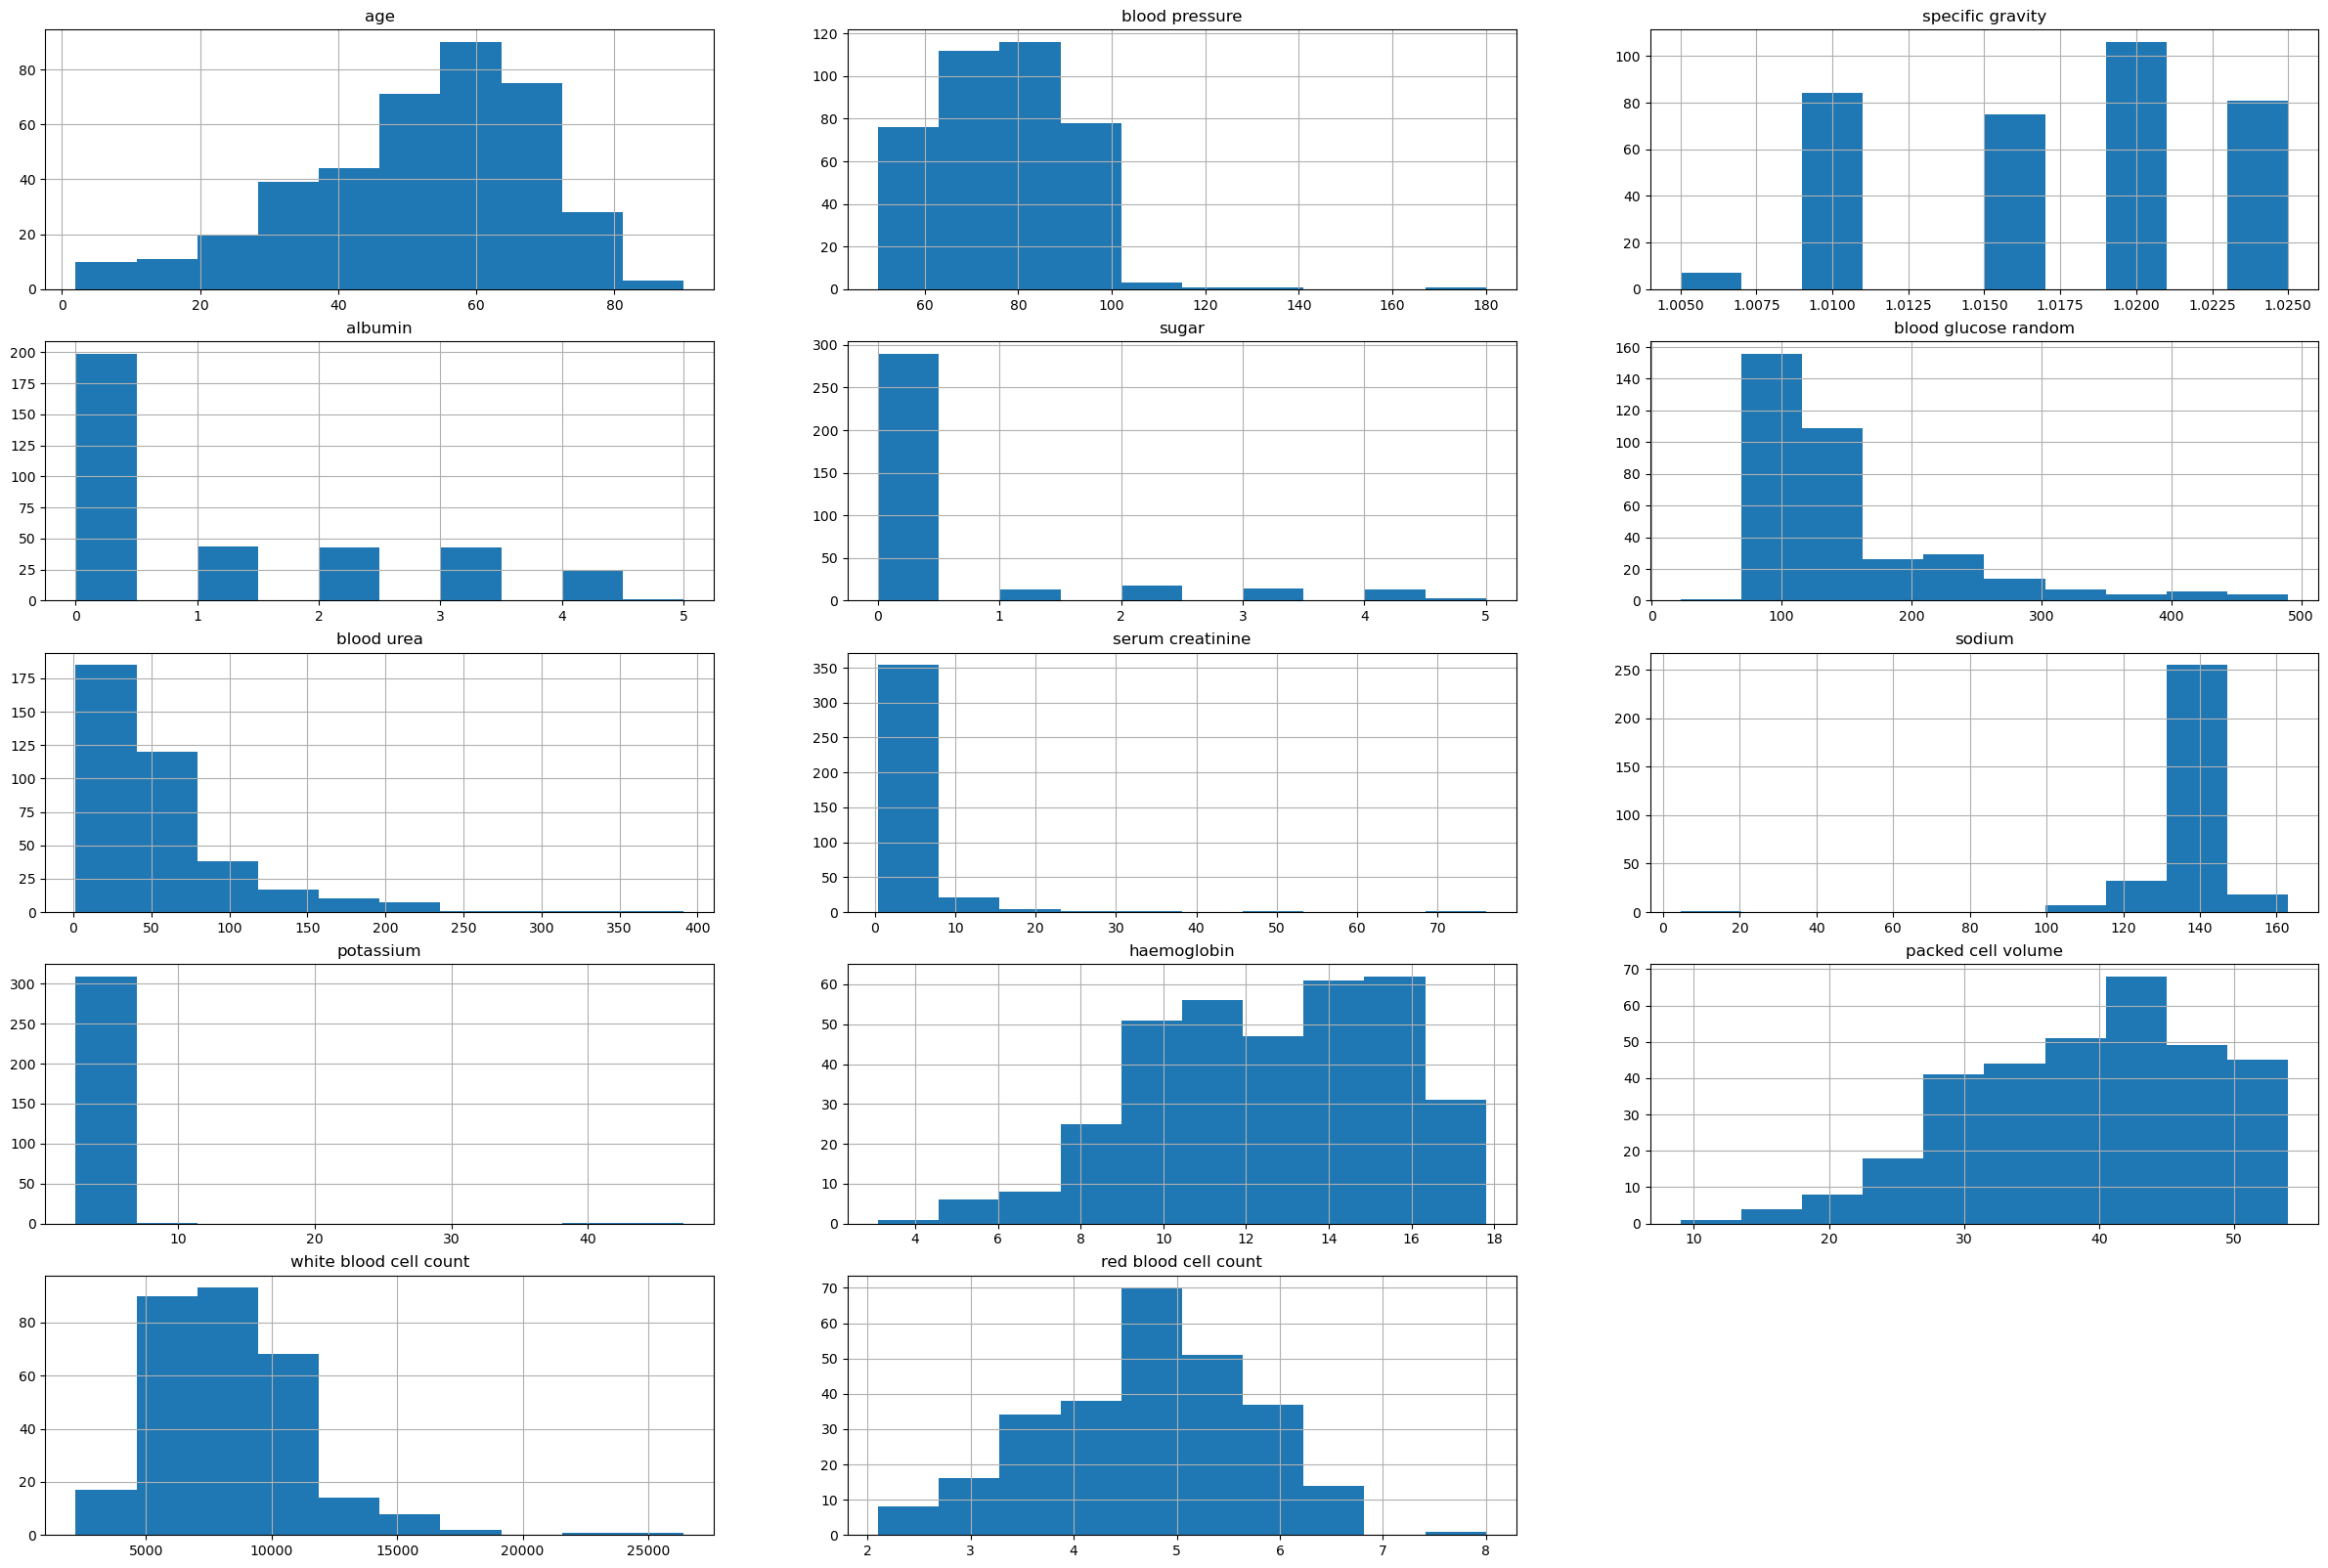

In [26]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

#### Check Label Distribution of Categorical Data

In [27]:
len(cat_cols)

11

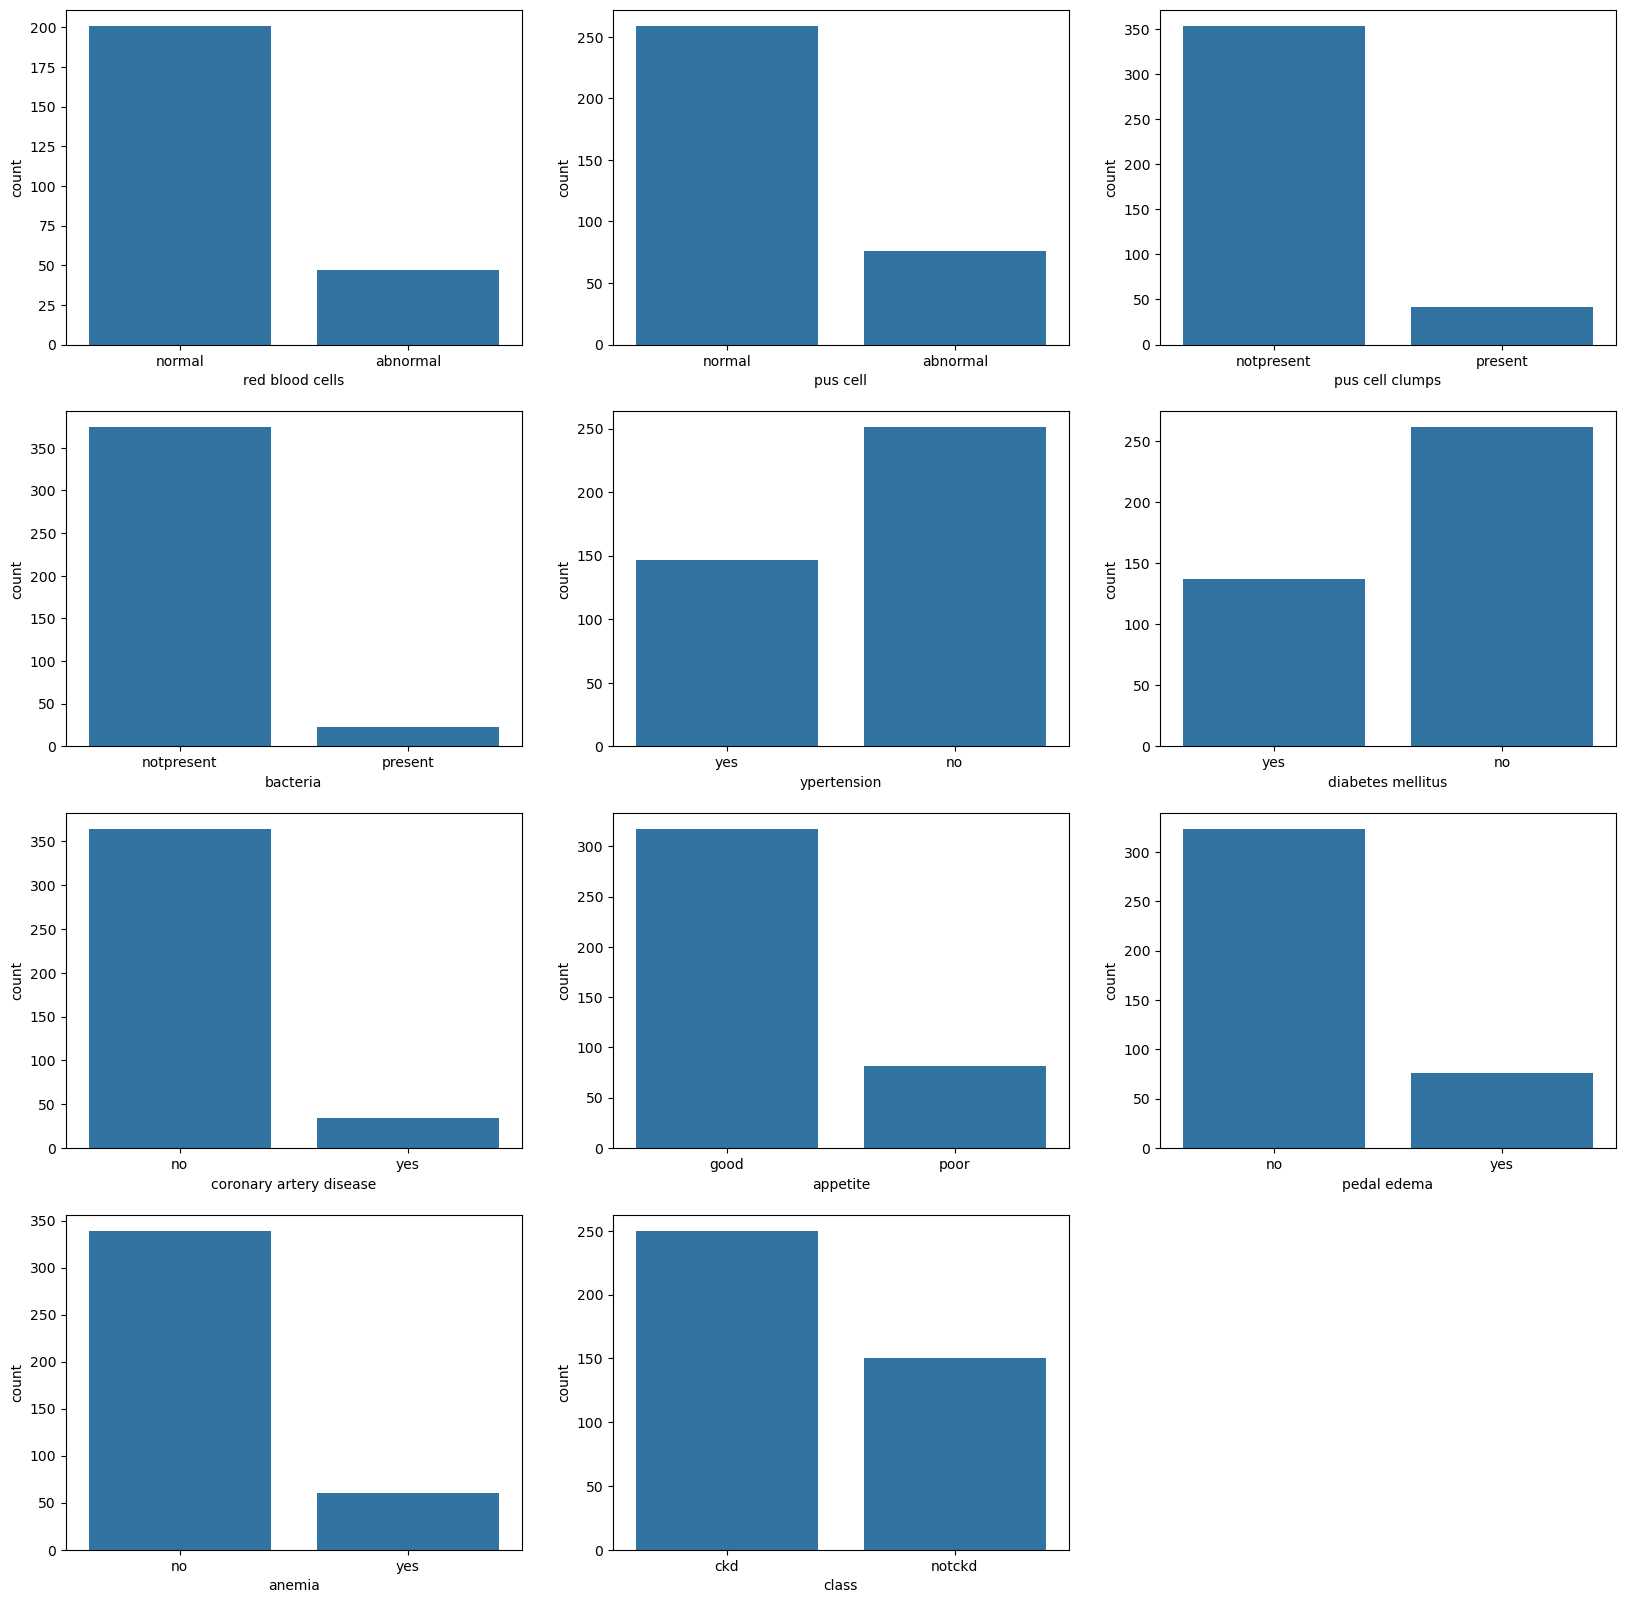

In [28]:
plt.figure(figsize=(20,20))
for i,feat in enumerate(cat_cols):
    plt.subplot(4,3,i+1)
    sns.countplot(x = df[feat])

#### Check how coluns are co-related with each other and its impact on Target Feature

<Axes: >

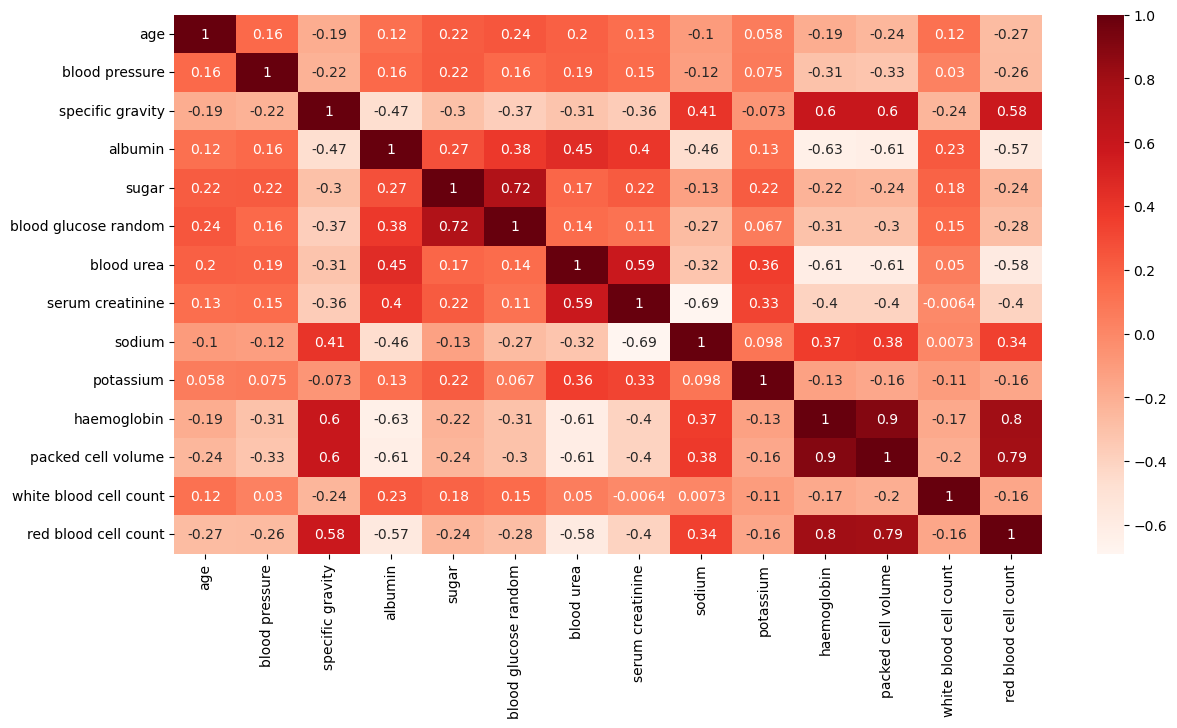

In [29]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Reds')

<Axes: >

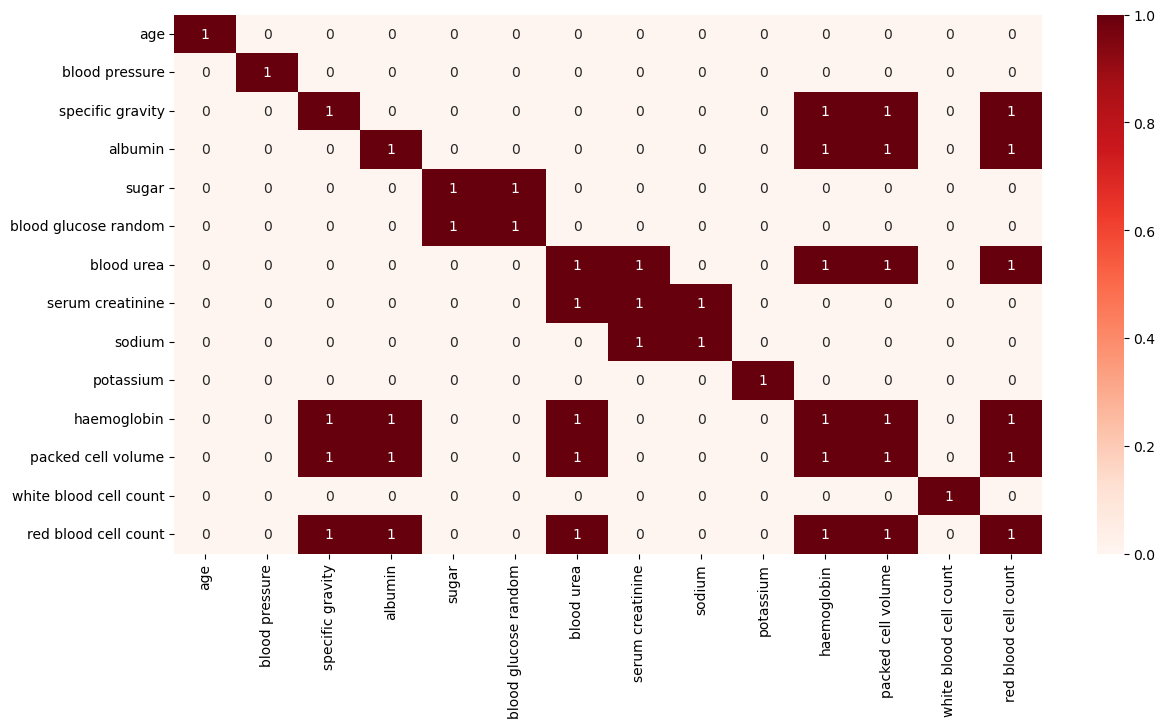

In [30]:
plt.figure(figsize=(14,7))
sns.heatmap((df.corr(numeric_only=True)>=.5)|(df.corr(numeric_only=True)<=-.5),annot=True,cmap='Reds')

In [31]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

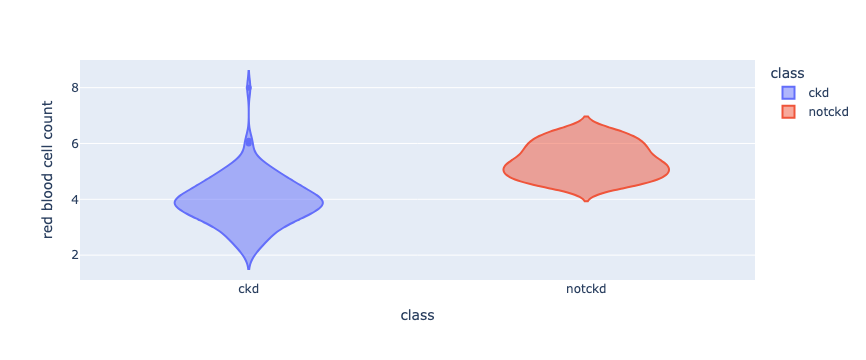

In [32]:
px.violin(df,y='red blood cell count',x='class',color='class')

#### Find the relation between haemoglobin and packed cell volume

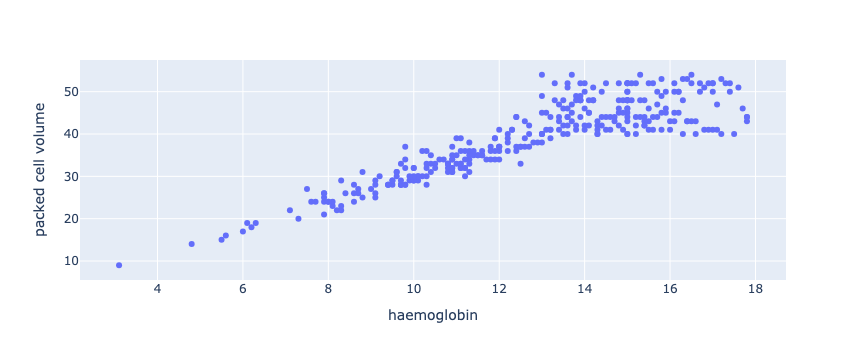

In [33]:
px.scatter(df,x='haemoglobin',y='packed cell volume')

#### Analyse distribution of 'red blood cell count' - chronic and non-chronic

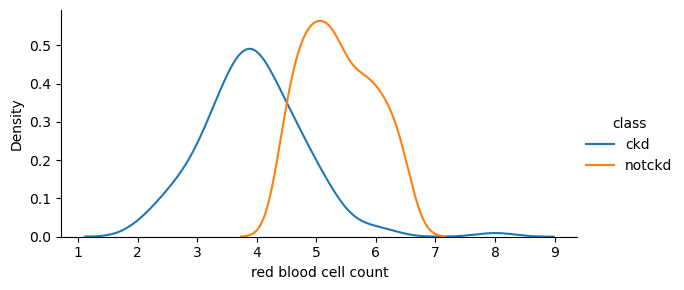

In [34]:
grid = sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

#### Automate Analysis

In [35]:
def violin(col):
    fig = px.violin(df,y=col,x='class',color='class',box=True)
    return fig.show()

In [36]:
def scatter(col1,col2):
    fig = px.scatter(df,x=col1,y=col2,color='class')
    return fig.show()

In [37]:
def kde_plot(feature):
    grid = sns.FacetGrid(df,hue='class',aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

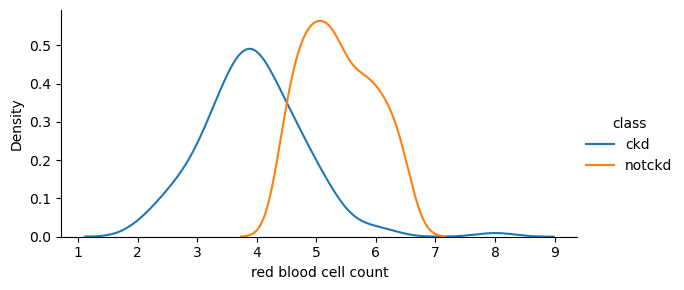

In [38]:
kde_plot('red blood cell count')

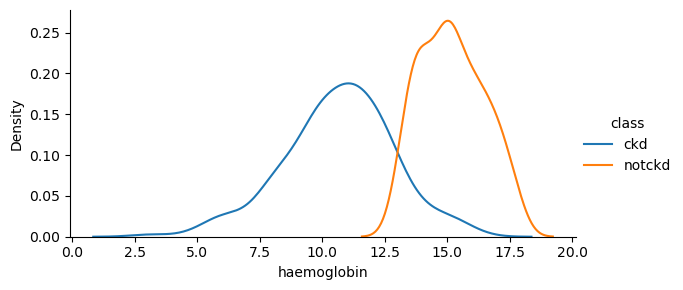

In [39]:
kde_plot('haemoglobin')

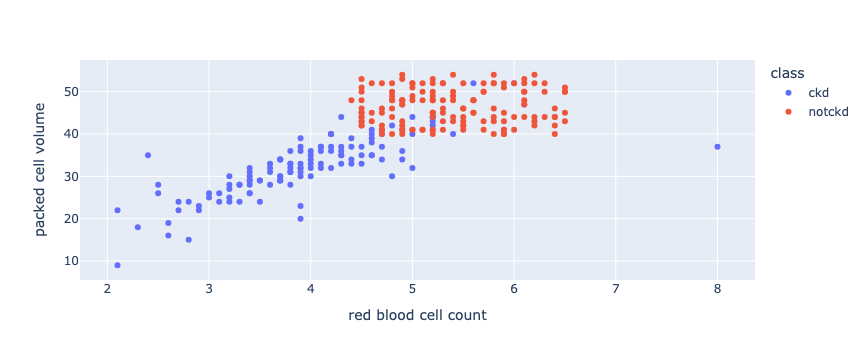

In [40]:
scatter('red blood cell count','packed cell volume')

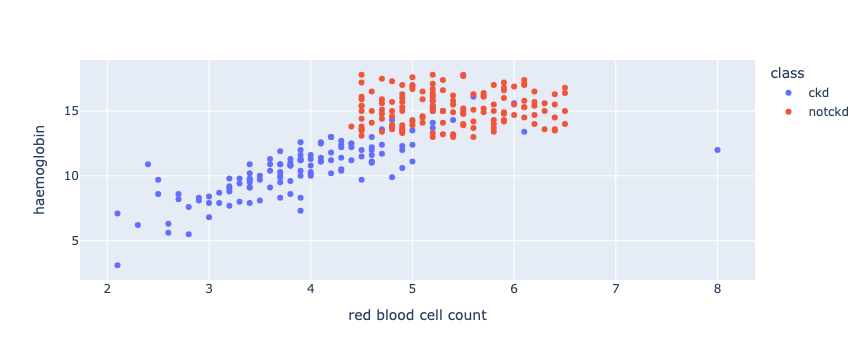

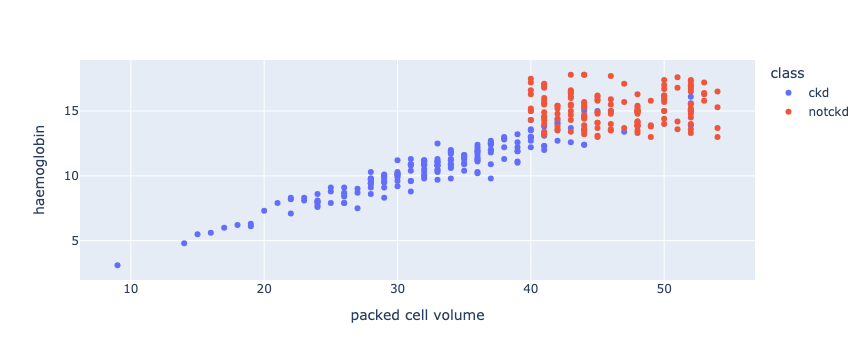

In [41]:
scatter('red blood cell count','haemoglobin')
scatter('packed cell volume','haemoglobin')

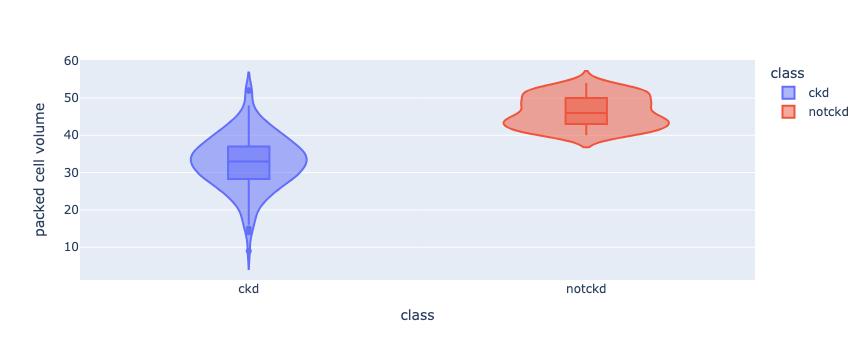

In [42]:
violin('packed cell volume')

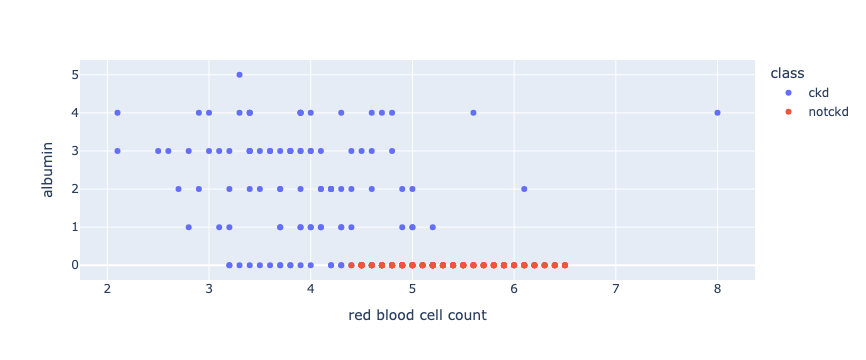

In [43]:
scatter('red blood cell count','albumin')

### Data Cleaning

In [44]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
pus cell                    65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [45]:
data = df.copy()

In [46]:
data['red blood cells'].dropna().sample()

24    normal
Name: red blood cells, dtype: object

In [47]:
data['red blood cells'].isna().sum()

152

In [48]:
random_sample = data['red blood cells'].dropna().sample(152)
random_sample

67       normal
180    abnormal
355      normal
321      normal
232    abnormal
293      normal
320      normal
145    abnormal
379      normal
8        normal
155    abnormal
112    abnormal
56       normal
226    abnormal
246    abnormal
133      normal
345      normal
388      normal
176      normal
395      normal
397      normal
312      normal
173    abnormal
229      normal
319      normal
358      normal
368      normal
84       normal
370      normal
278      normal
288      normal
128      normal
36       normal
287      normal
298      normal
178    abnormal
9      abnormal
303      normal
311      normal
376      normal
24       normal
294      normal
339      normal
154    abnormal
285      normal
325      normal
158      normal
181      normal
157      normal
373      normal
225    abnormal
239      normal
393      normal
399      normal
382      normal
276      normal
254      normal
359      normal
315      normal
332      normal
362      normal
177      normal
335     

In [49]:
data[data['red blood cells'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [50]:
random_sample.index = data[data['red blood cells'].isnull()].index

In [51]:
random_sample

0        normal
1      abnormal
5        normal
6        normal
10     abnormal
12       normal
13       normal
15     abnormal
16       normal
17       normal
18     abnormal
19     abnormal
21       normal
23     abnormal
25     abnormal
26       normal
28       normal
30       normal
31       normal
32       normal
37       normal
41       normal
42     abnormal
45       normal
46       normal
47       normal
50       normal
51       normal
52       normal
53       normal
57       normal
59       normal
60       normal
62       normal
64       normal
65     abnormal
68     abnormal
69       normal
70       normal
72       normal
75       normal
77       normal
78       normal
79     abnormal
80       normal
81       normal
82       normal
85       normal
86       normal
88       normal
89     abnormal
94       normal
95       normal
96       normal
97       normal
98       normal
99       normal
101      normal
102      normal
104      normal
105      normal
106      normal
108     

In [52]:
data.loc[data['red blood cells'].isna(),'red blood cells']=random_sample

In [53]:
data.isna().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells              0
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [54]:
def random_value_imputation(col):
    random_sample = data[col].dropna().sample(data[col].isna().sum())
    random_sample.index = data[data[col].isnull()].index
    data.loc[data[col].isna(),col]=random_sample

In [55]:
data[num_cols].isna().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [56]:
for col in num_cols:
    random_value_imputation(col)

In [57]:
data[cat_cols].isna().sum()

red blood cells             0
pus cell                   65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [58]:
random_value_imputation('pus cell')

In [59]:
data[cat_cols].isna().sum()

red blood cells            0
pus cell                   0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [60]:
def impute_mode(col):
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)

In [61]:
for col in cat_cols:
    impute_mode(col)

In [62]:
data[cat_cols].isna().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

### Feature Encoding

In [63]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.7,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,131.0,18.0,0.8,135.0,3.7,11.3,38.0,6000.0,5.9,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,147.0,5.3,9.6,31.0,7500.0,2.1,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,133.0,3.7,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood pressure           400 non-null    float64
 2   specific gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red blood cells          400 non-null    object 
 6   pus cell                 400 non-null    object 
 7   pus cell clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood glucose random     400 non-null    float64
 10  blood urea               400 non-null    float64
 11  serum creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [65]:
for col in cat_cols:
    print(f'{col} has {data[col].nunique()} categories')

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [66]:
## As we have only 2 or 3 categories in each feature, we will use label encoding
## Label Encoding

## normal -- 0
## abnormal -- 1

In [67]:
from sklearn.preprocessing import LabelEncoder as le

In [68]:
le = le()

In [69]:
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [70]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.7,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,131.0,18.0,0.8,135.0,3.7,11.3,38.0,6000.0,5.9,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,147.0,5.3,9.6,31.0,7500.0,2.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,3.7,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


#### Select Best Features using Feature Importance technique

In [71]:
from sklearn.feature_selection import SelectKBest, chi2

In [72]:
ind_col = [col for col in data.columns if col!='class']
dep_col = 'class'

In [73]:
x,y = data[ind_col], data[dep_col]

In [74]:
x.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.7,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,131.0,18.0,0.8,135.0,3.7,11.3,38.0,6000.0,5.9,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,147.0,5.3,9.6,31.0,7500.0,2.1,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,133.0,3.7,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [75]:
y.sample(5)

105    0
137    0
190    0
209    0
273    1
Name: class, dtype: int64

In [76]:
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_rank_features = ordered_rank_features.fit(x,y)

In [77]:
ordered_rank_features

SelectKBest(k=20, score_func=<function chi2 at 0x1508ea480>)

In [78]:
ordered_rank_features.scores_

array([1.25654238e+02, 8.99290919e+01, 5.21933952e-03, 2.35010747e+02,
       1.03623970e+02, 7.86403242e+00, 1.38744086e+01, 2.52000000e+01,
       1.32000000e+01, 2.52743239e+03, 2.55734591e+03, 3.73488177e+02,
       3.18595830e+01, 3.00799185e+00, 1.25678772e+02, 3.10268067e+02,
       1.22052463e+04, 2.22216537e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [79]:
datascores = pd.DataFrame(ordered_rank_features.scores_,columns=['Score'])
datascores

,Score
0,125.654238
1,89.929092
2,0.005219
3,235.010747
4,103.623970
5,7.864032
6,13.874409
7,25.200000
8,13.200000
9,2527.432393


In [80]:
datacols = pd.DataFrame(x.columns)
datacols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [81]:
features_rank = pd.concat([datacols,datascores],axis=1)
features_rank.columns = ['feature','score']
features_rank

,feature,score
0,age,125.654238
1,blood pressure,89.929092
2,specific gravity,0.005219
3,albumin,235.010747
4,sugar,103.623970
5,red blood cells,7.864032
6,pus cell,13.874409
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2527.432393


In [82]:
features_rank.nlargest(10,columns = 'score')

,feature,score
16,white blood cell count,12205.246262
10,blood urea,2557.345912
9,blood glucose random,2527.432393
11,serum creatinine,373.488177
15,packed cell volume,310.268067
3,albumin,235.010747
14,haemoglobin,125.678772
0,age,125.654238
4,sugar,103.623970
1,blood pressure,89.929092


In [83]:
selected_columns = features_rank.nlargest(10,columns = 'score').feature.values
selected_columns

array(['white blood cell count', 'blood urea', 'blood glucose random',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'blood pressure'], dtype=object)

In [84]:
x_new = data[selected_columns]
x_new

,white blood cell count,blood urea,blood glucose random,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,blood pressure
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,80.0
1,6000.0,18.0,131.0,0.8,38.0,4.0,11.3,7.0,0.0,50.0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,80.0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,70.0
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...
395,6700.0,49.0,140.0,0.5,47.0,0.0,15.7,55.0,0.0,80.0
396,7800.0,31.0,75.0,1.2,54.0,0.0,16.5,42.0,0.0,70.0
397,6600.0,26.0,100.0,0.6,49.0,0.0,15.8,12.0,0.0,80.0
398,7200.0,50.0,114.0,1.0,51.0,0.0,14.2,17.0,0.0,60.0


### Cross Validation 

In [85]:
from sklearn.model_selection import train_test_split as tts

In [86]:
x_train,x_test,y_train,y_test = tts(x_new,y,random_state=0,test_size=0.25)

In [87]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((300, 10), (300,), (100, 10), (100,))

In [88]:
y_train.value_counts()

class
0    188
1    112
Name: count, dtype: int64

In [89]:
y_test.value_counts()

class
0    62
1    38
Name: count, dtype: int64

In [90]:
from xgboost import XGBClassifier as xc

In [91]:
help(xc)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |
 |  Parameters
 |  ----------
 |
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |
 |      max_depth :  typing.Optional[int]
 |
 |          Maximum tree depth for base learners.
 |
 |      max_leaves : typing.Optional[int]
 |
 |          Maximum number of leaves; 0 indicates no limit.
 |
 |      max_bin : typing.Optional[int]
 |
 |          If using histogram-based algorithm, maximum number of bins per feature
 |
 |      grow_policy : typing.Optional[str]
 |
 |          Tree growing policy.
 |
 |          - depthwise: Favo

In [92]:
params = {
    'learning_rate':[.05,.2,.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[.0,.1,.2,.4],
    'colsample_bytree':[.3,.4,.7]
}


In [93]:
from sklearn.model_selection import RandomizedSearchCV as rcv

In [94]:
help(rcv)

Help on class RandomizedSearchCV in module sklearn.model_selection._search:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
 |
 |  Randomized search on hyper parameters.
 |
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 |  given by

In [95]:
classifier = xc()

In [96]:
random_search = rcv(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [97]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [98]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [100]:
classifier = xc(min_child_weight= 3,
                 max_depth= 8,
                 learning_rate= 0.05,
                 gamma= 0.4,
                 colsample_bytree= 0.7)

In [101]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [102]:
pred = classifier.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [104]:
print(accuracy_score(y_test,pred))

0.98


In [105]:
confusion_matrix(y_test,pred)

array([[61,  1],
       [ 1, 37]])